## Job Generation

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import csv

## Constants

In [183]:
# number of jobs
n = 10000
number_of_queues = 4
lmbda = 0.1
mu = 0.2
filePath = "jobs.csv"

In [184]:
jobsArray = []

class Job:
    def __init__(self, arrival_time, service_time, priority):
        self.priority = priority
        self.arrival_time = arrival_time
        self.service_time = service_time
        self.waiting_time = 0
        self.sojourn_time = 0
        self.departure = None
        self.first_service = None
        self.isJobDone = False

def load_jobs_from_csv(file_path):
    jobs = []
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            arrival_time, service_time, priority = map(float, row)
            job = Job(arrival_time, service_time, priority)
            jobs.append(job)
    return jobs
        
def generate_exponential_xi(n, lmbda):
    y = np.random.uniform(0, 1, n)
    x = [-np.log(1 - y[i]) / lmbda for i in range(len(y))]
    return x

def generate_si_sigma_xi(n):
    n_sorted = sorted(n)
    si_sigma_xi = []
    for i in range(len(n_sorted)):
        si_sigma_xi.append(sum(n_sorted[:i+1]))
    return si_sigma_xi

def generate_sizes(si_sigma_xi, mu):
    sizes = generate_exponential_xi(len(si_sigma_xi), mu)
    jobs = []
    for i in range(len(si_sigma_xi)):
        jobs.append(Job(si_sigma_xi[i], sizes[i], None))
    return jobs

def assign_priority(jobsArray, number_of_queues, average_service_time):
    bin_size = 2 * average_service_time / number_of_queues
    for job in jobsArray:
        priority = int(job.service_time / bin_size)
        if priority >= number_of_queues:
            priority = number_of_queues - 1
        job.priority = priority
    return jobsArray

def areJobsLeft(jobsArray):
    for job in jobsArray:
        if job.isJobDone == False:   
            return True
    return False

def getHighestPriorityJob(jobsArray,global_clock):
    index = -1
    priority = 100000
    for i, job in enumerate(jobsArray):
        if job.priority <= priority and global_clock >= job.arrival_time and job.isJobDone == False:
            priority = job.priority
            index = i 
            
    return index

def getNextJobArrival(jobsArray):
    index = -1
    for i, job in enumerate(jobsArray):
        if job.isJobDone == False:
            return i
    return None  

def simulate_queue(jobsArray,numJobs):
    global_clock = 0
    numJobsdone = 0
    while numJobsdone != numJobs:
        
        highest_priority_job_index = getHighestPriorityJob(jobsArray,global_clock)
        
        if highest_priority_job_index == -1:
            index =  getNextJobArrival(jobsArray)
            if index is None:
                break
            global_clock = jobsArray[index].arrival_time
            highest_priority_job_index = index

        currJob = jobsArray[highest_priority_job_index]  
        jobsArray[highest_priority_job_index].isJobDone = True 
        jobsArray[highest_priority_job_index].first_service = global_clock
        jobsArray[highest_priority_job_index].waiting_time = global_clock -  jobsArray[highest_priority_job_index].arrival_time
        jobsArray[highest_priority_job_index].sojourn_time = jobsArray[highest_priority_job_index].waiting_time + jobsArray[highest_priority_job_index].service_time
        global_clock += currJob.service_time  
        jobsArray[highest_priority_job_index].departure = global_clock
        numJobsdone += 1



## Queuing parameters

In [185]:
xi = generate_exponential_xi(n, lmbda)
si_sigma_xi = generate_si_sigma_xi(xi)
jobsArray = generate_sizes(si_sigma_xi, mu)
jobsArray = assign_priority(jobsArray, number_of_queues, 1/mu)
    
# Count number of jobs in each queue
count = [0] * number_of_queues
for job in jobsArray:
    count[job.priority] += 1
print("Counts per priority:", count)

jobsArray = load_jobs_from_csv(filePath)

# Simulate the queue with the given arrival times and sizes using sjf
simulate_queue(jobsArray,n)


Counts per priority: [3880, 2383, 1487, 2250]


In [186]:

print("Jobs:")
for job in jobsArray:
    print("Arrival Time:", job.arrival_time, "Service Time:", job.service_time, "Priority:", job.priority, "Waiting Time:", job.waiting_time, "Sojourn Time:", job.sojourn_time)


Jobs:
Arrival Time: 11.960744910874336 Service Time: 0.36408573917166204 Priority: 0.0 Waiting Time: 0.0 Sojourn Time: 0.36408573917166204
Arrival Time: 16.40448074901302 Service Time: 9.948380087145 Priority: 3.0 Waiting Time: 0.0 Sojourn Time: 9.948380087145
Arrival Time: 17.934422682647266 Service Time: 6.943907744157212 Priority: 2.0 Waiting Time: 11.637171228279037 Sojourn Time: 18.58107897243625
Arrival Time: 22.217479492200773 Service Time: 3.218733074768284 Priority: 1.0 Waiting Time: 4.1353813439572455 Sojourn Time: 7.35411441872553
Arrival Time: 32.564757461003055 Service Time: 3.0929408905789213 Priority: 1.0 Waiting Time: 3.950744194080457 Sojourn Time: 7.043685084659378
Arrival Time: 37.83961444253866 Service Time: 1.7039651286133288 Priority: 0.0 Waiting Time: 1.7688281031237736 Sojourn Time: 3.4727932317371026
Arrival Time: 43.46498829597523 Service Time: 14.50528170660958 Priority: 3.0 Waiting Time: 0.0 Sojourn Time: 14.50528170660958
Arrival Time: 44.44199079354856 Ser

## Average Time for simulation

In [187]:

def getAverageServiceTime(jobsArray):
    totserviceTime = 0
    for job in jobsArray:
        totserviceTime += job.service_time
    avg_time = totserviceTime/len(jobsArray)
    return avg_time    

def getAverageWaitingTime(jobsArray):
    totWaitingTime = 0
    for job in jobsArray:
        totWaitingTime += job.waiting_time
    avg_time = totWaitingTime/len(jobsArray)
    return avg_time  

def getAverageSojournTime(jobsArray):
    totSojournTime = 0
    for job in jobsArray:
        totSojournTime += job.sojourn_time
    avg_time = totSojournTime/len(jobsArray)
    return avg_time 
print("Average Service Time")
print(getAverageServiceTime(jobsArray))
print("Average Waiting Time")
print(getAverageWaitingTime(jobsArray))
print("Average Sojourn Time")
print(getAverageSojournTime(jobsArray))


4.98870749909832
3.811404522352155
8.800112021450461


## Waiting Times Vs Arrival

[(11.960744910874336, 0.0, 0.0), (16.40448074901302, 0.0, 3.0), (17.934422682647266, 11.637171228279037, 2.0), (22.217479492200773, 4.1353813439572455, 1.0), (32.564757461003055, 3.950744194080457, 1.0), (37.83961444253866, 1.7688281031237736, 0.0), (43.46498829597523, 0.0, 3.0), (44.44199079354856, 15.62366699026201, 0.0), (45.5501234951121, 12.420146507472708, 0.0), (49.973488127318134, 16.051762579101137, 2.0), (52.05288286499288, 21.25723703382961, 3.0), (57.34829750760977, 4.026263934590531, 1.0), (61.23396505680801, 0.0002762406692369268, 0.0), (85.19722559438702, 0.0, 0.0), (91.47590812883908, 0.0, 3.0), (103.10158681320071, 17.639518083523, 3.0), (127.42209073193854, 5.699542201888875, 2.0), (166.715463766138, 0.0, 0.0), (167.44084989257792, 0.35209438759264344, 0.0), (191.342631491854, 0.0, 3.0), (196.0741425729507, 5.551846714515648, 1.0), (197.35902558071035, 3.433372385276897, 0.0), (203.34742099020357, 3.0539790670748914, 3.0), (229.2060995863869, 0.0, 0.0), (250.081399762

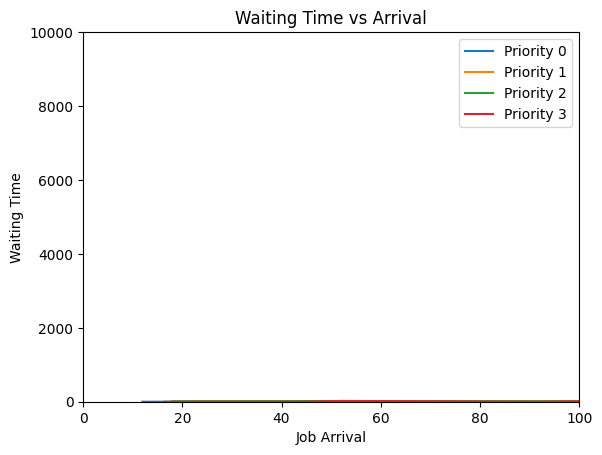

In [188]:
waitingTimesArray = []

for i, job in enumerate(jobsArray):
    waitingTimesArray.append((job.arrival_time,job.waiting_time,job.priority))
    
print(waitingTimesArray)

priority_data = {}
for arrival_time, waiting_time, priority in waitingTimesArray:
    if priority not in priority_data:
        priority_data[priority] = {'arrival_time': [], 'waiting_time': []}
    priority_data[priority]['arrival_time'].append(arrival_time)
    priority_data[priority]['waiting_time'].append(waiting_time)

for priority in range(4):
    if priority in priority_data:
        data = priority_data[priority]
        plt.plot(data['arrival_time'], data['waiting_time'], label=f'Priority {priority}')

plt.xlabel('Job Arrival')
plt.ylabel('Waiting Time')
plt.ylim([0,10000])
plt.xlim([0,100])
plt.title('Waiting Time vs Arrival')
plt.legend()
plt.show()

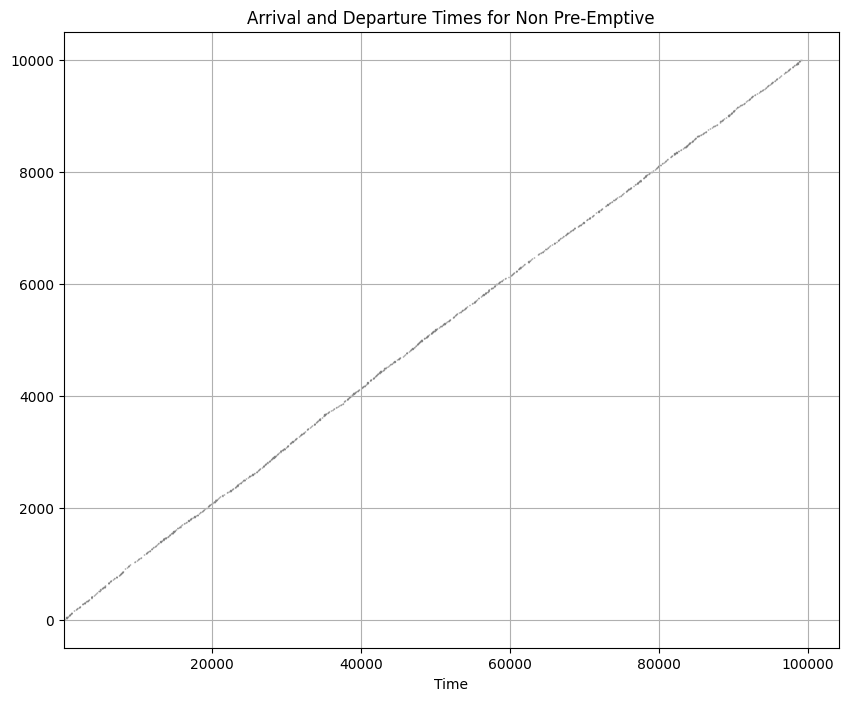

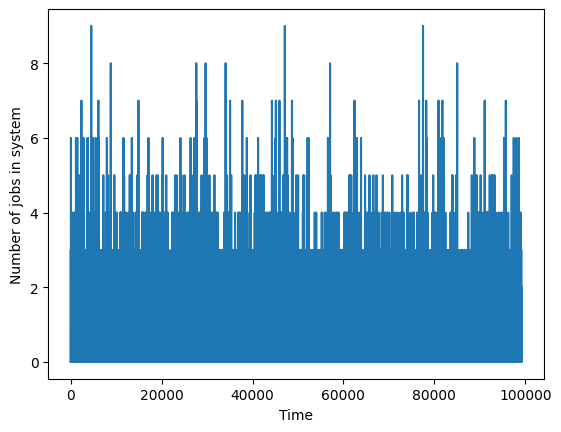

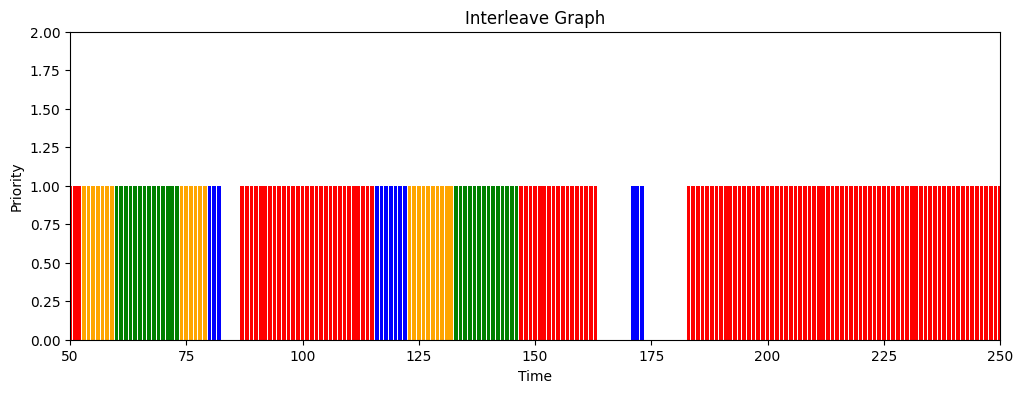

In [189]:
def plot_time_for_each_job_barh(jobsArray):
    arrival_times = []
    duration = []
    index = []
    count = 0
    for i in jobsArray:
        arrival_times.append(i.arrival_time)
        duration.append(i.service_time + i.waiting_time)
        index.append(count)
        count += 1
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(index, duration, left=arrival_times, color='skyblue', edgecolor='grey')
    ax.set_xlabel('Time')
    ax.set_title('Arrival and Departure Times for Non Pre-Emptive')
    plt.grid(True)
    plt.show()

def number_of_jobs_in_system_at_any_time(jobsArray):
    arrival_times = []
    departure = []
    timestamps=[]
    counts = []
    unit_time = 0.25
    time = 0
    for i in jobsArray:
        arrival_times.append(i.arrival_time)
        departure.append(i.arrival_time + i.service_time + i.waiting_time)
    while(time<max(departure)):
        timestamps.append(time)
        arrivals = 0
        departures = 0
        for atime in arrival_times:
            if atime<time:
                arrivals+=1
        for dtime in departure:
            if dtime<time:
                departures+=1  
        counts.append(arrivals-departures)  
        time += unit_time
    plt.plot(timestamps,counts)
    plt.xlabel("Time")
    plt.ylabel("Number of jobs in system")
    plt.show()

def which_job_is_being_served(jobsArray):
    timestamps = []
    job_served = []
    colors = []
    time = 0
    unit_time = 0.5
    max_departure = 0
    
    for job in jobsArray:
        job.first_service = job.arrival_time + job.waiting_time
        job.departure = job.arrival_time + job.waiting_time + job.service_time
        max_departure = max(job.departure, max_departure)
    
    while time < max_departure:
        timestamps.append(time)
        priority = -1
        
        for job in jobsArray:
            if job.first_service <= time and job.departure>time :
                priority = job.priority
                break
        
        if priority != -1:
            job_served.append(1)
            if priority == 0:
                colors.append("blue")
            elif priority == 1:
                colors.append("orange")
            elif priority == 2:
                colors.append("green")
            elif priority == 3:
                colors.append("red")
        else:
            job_served.append(0)
            colors.append("white")
        
        time += unit_time
    
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(timestamps)), [1] * len(job_served), color=colors)
    plt.ylim(0,2)
    plt.xlim(50,250)
    plt.xlabel('Time')
    plt.ylabel('Priority')
    plt.title('Interleave Graph')
    plt.show()
    
plot_time_for_each_job_barh(jobsArray)
number_of_jobs_in_system_at_any_time(jobsArray)
which_job_is_being_served(jobsArray)